<a href="https://colab.research.google.com/github/Werricsson-Santos/image-similarity-recommendations/blob/master/image_similarity_recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
from google.colab import drive
import gdown

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import gdown

query_images_id = "1PtaQxtCZgWjNESns9tKhQj9K1j574YQa"  # Query images

all_images_id = "1Y9j6a1ebJFP8yRGnL83dY5CdepghroGB"  # All images

# Caminho para salvar as imagens no Colab
all_images_folder = "/content/all_images"
os.makedirs(all_images_folder, exist_ok=True)

query_images_folder = "/content/query_images"
os.makedirs(query_images_folder, exist_ok=True)

# Listar os arquivos na pasta do Google Drive
gdrive_url = f"https://drive.google.com/drive/folders/{all_images_id}?usp=sharing"
print(f"Acessando pasta no Google Drive: {gdrive_url}")

# URL de compartilhamento da pasta convertida para baixável
folder_url = f"https://drive.google.com/drive/folders/{all_images_id}?usp=sharing"
os.system(f'gdown --folder {folder_url} -O {all_images_folder}')

# Listar os arquivos na pasta do Google Drive
gdrive_url = f"https://drive.google.com/drive/folders/{query_images_id}?usp=sharing"
print(f"Acessando pasta no Google Drive: {gdrive_url}")

# URL de compartilhamento da pasta convertida para baixável
folder_url = f"https://drive.google.com/drive/folders/{query_images_id}?usp=sharing"
os.system(f'gdown --folder {folder_url} -O {query_images_folder}')

Acessando pasta no Google Drive: https://drive.google.com/drive/folders/1Y9j6a1ebJFP8yRGnL83dY5CdepghroGB?usp=sharing
Acessando pasta no Google Drive: https://drive.google.com/drive/folders/1PtaQxtCZgWjNESns9tKhQj9K1j574YQa?usp=sharing


0

In [5]:
import numpy as np
from numpy import linalg as LA

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#Understand the VGG16 model.
model = VGG16(weights = 'imagenet',
              input_shape = ((224, 224, 3)),
              pooling = 'max',
              include_top = False)
model.summary()
#See how the final output gives us a vector oof size 512


class VGGNet:
    def __init__(self):
        # weights: 'imagenet'
        # pooling: 'max' or 'avg'
        # input_shape: (width, height, 3), width and height should >= 48
        self.input_shape = (224, 224, 3)
        self.weight = 'imagenet'
        self.pooling = 'max'
        self.model = VGG16(weights = self.weight, input_shape = (self.input_shape[0], self.input_shape[1], self.input_shape[2]), pooling = self.pooling, include_top = False)
        self.model.predict(np.zeros((1, 224, 224 , 3)))


    '''
    Use vgg16 model to extract features
    Output normalized feature vector
    '''
    def extract_feat(self, img_path):
        img = image.load_img(img_path, target_size=(self.input_shape[0], self.input_shape[1]))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        feat = self.model.predict(img)
        norm_feat = feat[0]/LA.norm(feat[0])
        return norm_feat

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import os
import h5py
import numpy as np

images_path ="/content/all_images/"
img_list = [os.path.join(images_path,f) for f in os.listdir(images_path)]


print("  start feature extraction ")


model = VGGNet()

path = "/content/all_images/"

feats = []
names = []

for im in os.listdir(path):  #iterate through all images to extract features
    print("Extracting features from image - ", im)
    X = model.extract_feat(path+im)

    feats.append(X)
    names.append(im)

feats = np.array(feats)

# directory for storing extracted features
output = "CNNFeatures.h5"

print(" writing feature extraction results to h5 file")

h5f = h5py.File(output, 'w')
h5f.create_dataset('dataset_1', data=feats)
h5f.create_dataset('dataset_2', data=np.bytes_(names))  # Use np.bytes_ instead of np.string_
h5f.close()

  start feature extraction 
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Extracting features from image -  sneaker_3.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Extracting features from image -  perfum_5.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Extracting features from image -  smartphone_4.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Extracting features from image -  wristwatch_1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Extracting features from image -  smartphone_1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Extracting features from image -  wristwatch_4.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Extracting features from image -  smartphone_5.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Extracting features from image -  smartphone_2.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Extracting features from image -  perfum_4.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Extracting features from image -  perfum_1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Extracting features from image -  perfum_2.jpeg
1/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test image:


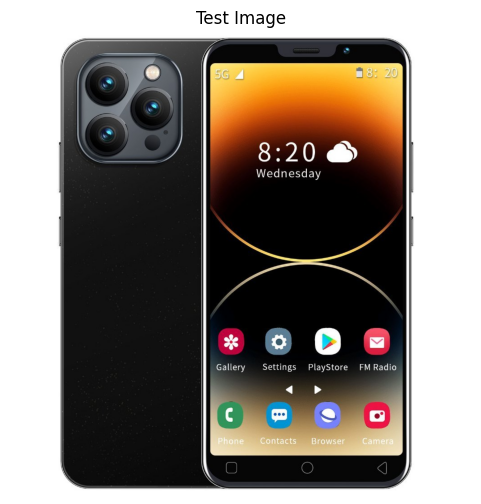

In [7]:
import h5py
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def plot_feature_space(features, query_feat, top_matches, imgNames, title="Feature Space Visualization"):
    """Visualize high-dimensional features in 3D using PCA"""
    # Apply PCA to reduce dimensions to 3
    pca = PCA(n_components=3)
    # Combine query and database features
    all_features = np.vstack([features, query_feat.reshape(1, -1)])
    features_3d = pca.fit_transform(all_features)

    # Split back into database and query
    db_features_3d = features_3d[:-1]
    query_feature_3d = features_3d[-1]

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot all database points
    ax.scatter(db_features_3d[:, 0], db_features_3d[:, 1], db_features_3d[:, 2],
              c='blue', alpha=0.5, label='Database features')

    # Plot query point
    ax.scatter(query_feature_3d[0], query_feature_3d[1], query_feature_3d[2],
              c='red', s=100, label='Query image')

    # Plot top matches
    matches_3d = db_features_3d[top_matches]
    ax.scatter(matches_3d[:, 0], matches_3d[:, 1], matches_3d[:, 2],
              c='green', s=100, label='Top matches')

    # Add labels for top matches
    for i, match_idx in enumerate(top_matches):
        img_name = imgNames[match_idx].decode('utf-8') if isinstance(imgNames[match_idx], bytes) else imgNames[match_idx]
        ax.text(matches_3d[i, 0], matches_3d[i, 1], matches_3d[i, 2], f'{i+1}. {img_name}')

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(title)
    ax.legend()
    plt.show()

# Your existing code...
h5f = h5py.File("CNNFeatures.h5",'r')
feats = h5f['dataset_1'][:]
imgNames = h5f['dataset_2'][:]
h5f.close()

queryImg = "/content/query_images/smartphone.jpeg"
model = VGGNet()
query_feat = model.extract_feat(queryImg)

scores = []
from scipy import spatial
for i in range(feats.shape[0]):
    score = 1-spatial.distance.cosine(query_feat, feats[i])
    scores.append(score)
scores = np.array(scores)
rank_ID = np.argsort(scores)[::-1]
rank_score = scores[rank_ID]

# Get top 3 matches
top_n = 3
top_matches = rank_ID[:top_n]
top_scores = rank_score[:top_n]

test_image = Image.open(queryImg)

# Show test image
print("Test image:")
test_image = Image.open(queryImg)
plt.figure(figsize=(6, 6))
plt.imshow(test_image)
plt.axis('off')
plt.title("Test Image")
plt.show()

Top 3 matches with similarity scores:
1. Image: smartphone_3.jpeg, Score: 0.7027
2. Image: smartphone_4.jpeg, Score: 0.6693
3. Image: smartphone_5.jpeg, Score: 0.6491


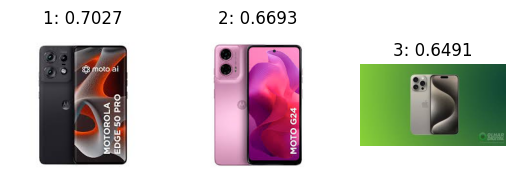

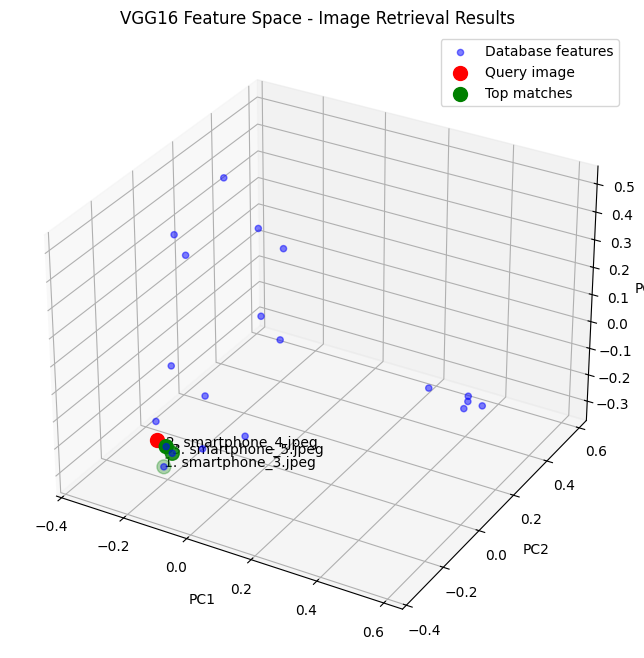

In [8]:
# Print matches
print(f"Top {top_n} matches with similarity scores:")
for i, (image_id, score) in enumerate(zip(top_matches, top_scores)):
    image_name = imgNames[image_id].decode('utf-8') if isinstance(imgNames[image_id], bytes) else imgNames[image_id]
    print(f"{i+1}. Image: {image_name}, Score: {score:.4f}")

    # Load and display the image
    img_path = os.path.join("/content/all_images", image_name)  # Adjust the path to your images
    if os.path.exists(img_path):  # Ensure the image file exists
        img = Image.open(img_path)
        plt.subplot(1, top_n, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{i+1}: {score:.4f}")
    else:
        print(f"Image file not found: {img_path}")

# Visualize feature space
plot_feature_space(feats, query_feat, top_matches, imgNames,
                  "VGG16 Feature Space - Image Retrieval Results")